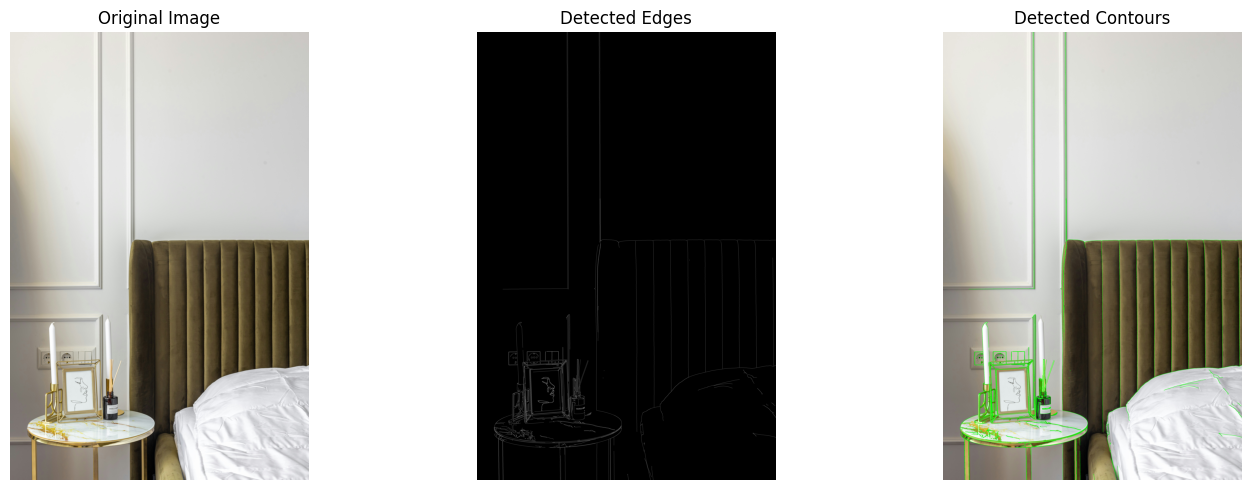

Found 359 contours in the image


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess(image_path):
    """
    Load an image and prepare it for edge detection by converting to grayscale
    and applying Gaussian blur to reduce noise.
    
    Args:
        image_path (str): Path to the input image
        
    Returns:
        tuple: Original image and preprocessed grayscale image
    """
    # Read the original image
    image = cv2.imread(image_path)
    
    # Convert to RGB for proper display with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    # The (5,5) kernel size determines the amount of blurring
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    return image_rgb, blurred

def detect_edges(image, low_threshold=50, high_threshold=150):
    """
    Apply Canny edge detection to find significant edges in the image.
    
    Args:
        image (numpy.ndarray): Preprocessed grayscale image
        low_threshold (int): Lower threshold for edge detection
        high_threshold (int): Higher threshold for edge detection
        
    Returns:
        numpy.ndarray: Binary image containing detected edges
    """
    # Apply Canny edge detection
    # The thresholds determine what is considered an edge:
    # - Gradients below low_threshold are not edges
    # - Gradients above high_threshold are definitely edges
    # - Gradients between thresholds are edges only if connected to strong edges
    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

def find_and_draw_contours(image, edges):
    """
    Find contours in the edge image and draw them on the original image.
    
    Args:
        image (numpy.ndarray): Original RGB image
        edges (numpy.ndarray): Binary edge image
        
    Returns:
        tuple: Image with contours and list of contours
    """
    # Find contours in the edge image
    # RETR_EXTERNAL retrieves only the extreme outer contours
    # CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the original image to draw on
    image_with_contours = image.copy()
    
    # Draw all contours on the image
    # -1 means draw all contours, (0, 255, 0) is green color, 2 is thickness
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
    
    return image_with_contours, contours

def visualize_results(original, edges, contoured):
    """
    Display the original image, detected edges, and contoured image side by side.
    
    Args:
        original (numpy.ndarray): Original RGB image
        edges (numpy.ndarray): Binary edge image
        contoured (numpy.ndarray): Image with drawn contours
    """
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(edges, cmap='gray')
    plt.title('Detected Edges')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(contoured)
    plt.title('Detected Contours')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def process_image(image_path, low_threshold=50, high_threshold=150):
    """
    Complete pipeline for edge and contour detection.
    
    Args:
        image_path (str): Path to the input image
        low_threshold (int): Lower threshold for Canny edge detection
        high_threshold (int): Higher threshold for Canny edge detection
    """
    # Load and preprocess the image
    original, preprocessed = load_and_preprocess(image_path)
    
    # Detect edges
    edges = detect_edges(preprocessed, low_threshold, high_threshold)
    
    # Find and draw contours
    contoured, contours = find_and_draw_contours(original, edges)
    
    # Visualize results
    visualize_results(original, edges, contoured)
    
    # Print information about detected contours
    print(f"Found {len(contours)} contours in the image")

# Example usage
if __name__ == "__main__":
    # Replace with your image path
    image_path = "./the-prototype-pUHVW__X52s-unsplash.jpg"
    process_image(image_path)